In [1]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from bayes_opt import BayesianOptimization
import catboost as cb
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# 解决中文乱码问题
plt.rcParams["font.sans-serif"]=["SimHei"] 
plt.rcParams["axes.unicode_minus"]=False

In [2]:
pd_1=pd.read_excel(r'.\预测对照.xlsx')
pd_1=pd_1.drop(['Unnamed: 0','y_hat'],axis=1)
pd_1

,Zr,Ni,Zn,Mg,Na,Pt,Cr,Mn,K,Co,...,Z-5,温度(_摄氏度),时间(h),循环,流量（丙烷）,流量（氢气）,流量（CO2）,流量（保护气）,WHSV(流量),Y


In [3]:
data_1 = pd.DataFrame(np.zeros((10000, 59)))
data_1.columns = pd_1.columns
data_predict1 = pd.concat([pd_1, data_1])

In [4]:
for i in range(10000):
    data_predict1.iloc[i,5]=round(random.uniform(0,3),4)
    data_predict1.iloc[i,10]=round(random.uniform(0,3),4)
    data_predict1.iloc[i,31]=100-data_predict1.iloc[i,15]-data_predict1.iloc[i,3]
    data_predict1.iloc[:, 50] = 600
    data_predict1.iloc[:, 51] = 2
    data_predict1.iloc[:, 52] = 2
    data_predict1.iloc[:, 53] = 20
    data_predict1.iloc[:, 54] = 20
    data_predict1.iloc[:, 55] = 10
    data_predict1.iloc[:, 56] = 50
    data_predict1.iloc[:, 57] = 5

In [5]:
data_predict1.loc[:,'Al2O3']

0       100.0
1       100.0
2       100.0
3       100.0
4       100.0
        ...  
9995    100.0
9996    100.0
9997    100.0
9998    100.0
9999    100.0
Name: Al2O3, Length: 10000, dtype: float64

In [6]:
data=pd.read_excel('./use.xlsx')
train_data,test_data=train_test_split(data,test_size=0.2, random_state=1314)
feature=train_data.drop(['Y','Unnamed: 0'],axis=1)
label=train_data['Y']

In [7]:
# 结果预测（二元催化剂）
model = cb.CatBoostRegressor(iterations=370,subsample=0.58,max_depth=10,l2_leaf_reg=3.680600849975441,
                             silent=True,random_state=1314,learning_rate=0.25850134121802654).fit(X=feature , y=label)
y_hat = pd.DataFrame(model.predict(np.array(data_predict1.drop(['Y'],axis=1))))
data_predict1['y_hat'] = y_hat
data_predict1.sort_values(by='y_hat', inplace=True, ascending=False)
# data_predict1.to_excel('预测催化剂.xlsx')

In [8]:
data_predict1

,Zr,Ni,Zn,Mg,Na,Pt,Cr,Mn,K,Co,...,温度(_摄氏度),时间(h),循环,流量（丙烷）,流量（氢气）,流量（CO2）,流量（保护气）,WHSV(流量),Y,y_hat
5000,0.0,0.0,0.0,0.0,0.0,0.8948,0.0,0.0,0.0,0.0,...,600,2,2,20,20,10,50,5,0.0,0.148001
2196,0.0,0.0,0.0,0.0,0.0,2.0582,0.0,0.0,0.0,0.0,...,600,2,2,20,20,10,50,5,0.0,0.148001
6924,0.0,0.0,0.0,0.0,0.0,1.9511,0.0,0.0,0.0,0.0,...,600,2,2,20,20,10,50,5,0.0,0.148001
6932,0.0,0.0,0.0,0.0,0.0,2.2081,0.0,0.0,0.0,0.0,...,600,2,2,20,20,10,50,5,0.0,0.148001
2226,0.0,0.0,0.0,0.0,0.0,0.8290,0.0,0.0,0.0,0.0,...,600,2,2,20,20,10,50,5,0.0,0.148001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9846,0.0,0.0,0.0,0.0,0.0,0.1091,0.0,0.0,0.0,0.0,...,600,2,2,20,20,10,50,5,0.0,0.089602
9073,0.0,0.0,0.0,0.0,0.0,0.1204,0.0,0.0,0.0,0.0,...,600,2,2,20,20,10,50,5,0.0,0.089602
318,0.0,0.0,0.0,0.0,0.0,0.0594,0.0,0.0,0.0,0.0,...,600,2,2,20,20,10,50,5,0.0,0.089602
3623,0.0,0.0,0.0,0.0,0.0,0.0785,0.0,0.0,0.0,0.0,...,600,2,2,20,20,10,50,5,0.0,0.089602


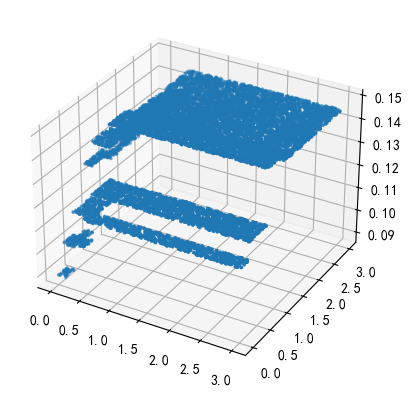

In [9]:
fig = plt.figure()  #定义新的三维坐标轴
ax3 = plt.axes(projection='3d')

#定义三维数据
X=data_predict1.iloc[:,5]
Y=data_predict1.iloc[:,10]
Z=data_predict1.iloc[:,59]

#作图
ax3.scatter3D(X,Y,Z, cmap='Blues',s=3)  #绘制散点图
#ax3.contour(X,Y,Z, zdim='z',offset=-2，cmap='rainbow)   #等高线图，要设置offset，为Z的最小值
plt.show()


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [11]:
X, Y = np.meshgrid(X, Y)
Z1 = []
for z in Z:
    Z1.append([z for y in Y]) 

In [12]:
Z1=np.array(Z1)

In [13]:
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.plot_surface(X, Y, Z1, rstride=1, cstride=1, cmap=cm.viridis)
# ax.set_title('3D Surface Plot')
# ax.set_xlabel('x')
# ax.set_ylabel('y') 
# ax.set_zlabel('z')
# ax.xaxis.set_major_locator(LinearLocator(5))
# ax.yaxis.set_major_locator(LinearLocator(5))
# ax.zaxis.set_major_locator(LinearLocator(5))
# plt.show()